In [1]:
import os
import pandas as pd

In [2]:
current_directory = os.getcwd()
parent_directry = os.path.dirname(current_directory)
database_directory = parent_directry + '\\sqlite3'

In [3]:
database_directory

'C:\\Users\\gibra\\Desktop\\Data Science\\Portfolio\\SQL\\sqlite3'

# **Library for SQL in Python**

In [4]:
#Import SQL
import sqlite3

In [5]:
# Connect to a database (creates a new database if it doesn't exist)
conn = sqlite3.connect(database_directory + '\\database.db')

In [6]:
#Create a cursor object to execute SQL statements
cursor = conn.cursor()

# Chicago Socieconomic Data

## Load data into a csv and export to sql

In [7]:
'''In order to convert a pandas DataFrame into a table for our SQL database,
so that it can be accessed and queried using SQL commands, we can use the pandas dataframe to_sql() function.'''
#For example: Let's load data from the Chicago open data portal about socieconomic indicators in the city. 
# The data will be load from a csv file into a pandas dataframe, and then persisted to our database
socioeconomic_df = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
socioeconomic_df.to_sql('socioeconomic_data', conn, if_exists='replace', index=False)

78

In [8]:
socioeconomic_df

ca community_area_name  percent_of_housing_crowded  \
0    1.0         Rogers Park                         7.7   
1    2.0          West Ridge                         7.8   
2    3.0              Uptown                         3.8   
3    4.0      Lincoln Square                         3.4   
4    5.0        North Center                         0.3   
..   ...                 ...                         ...   
73  74.0     Mount Greenwood                         1.0   
74  75.0         Morgan Park                         0.8   
75  76.0              O'Hare                         3.6   
76  77.0           Edgewater                         4.1   
77   NaN             CHICAGO                         4.7   

    percent_households_below_poverty  percent_aged_16_unemployed  \
0                               23.6                         8.7   
1                               17.2                         8.8   
2                               24.0                         8.9   
3                               10.9                         8.2   
4                                7.5                         5.2   
..                               ...                         ...   
73                               3.4                         8.7   
74                              13.2                        15.0   
75                              15.4                         7.1   
76                              18.2                         9.2   
77                              19.7                        12.9   

    percent_aged_25_without_high_school_diploma  \
0                                          18.2   
1                                          20.8   
2                                          11.8   
3                                          13.4   
4                                           4.5   
..                                          ...   
73                                          4.3   
74                                         10.8   
75                                         10.9   
76                                          9.7   
77                                         19.5   

    percent_aged_under_18_or_over_64  per_capita_income_  hardship_index  
0                               27.5               23939            39.0  
1                               38.5               23040            46.0  
2                               22.2               35787            20.0  
3                               25.5               37524            17.0  
4                               26.2               57123             6.0  
..                               ...                 ...             ...  
73                              36.8               34381            16.0  
74                              40.3               27149            30.0  
75                              30.3               25828            24.0  
76                              23.8               33385            19.0  
77                              33.5               28202             NaN  

[78 rows x 9 columns]

## Question 1: How many rows are in the data set?

In [9]:
count_query = 'SELECT COUNT(*) FROM SOCIOECONOMIC_DATA'
cursor.execute(count_query)
rows = cursor.fetchone()

rows[0]

78

## Question 2: How many community areas in Chicago have a hardship index greater than 50.0?

In [10]:
count_hardship_query = 'SELECT count(*) FROM SOCIOECONOMIC_DATA WHERE HARDSHIP_INDEX > 50'
cursor.execute(count_hardship_query)
rows = cursor.fetchone()

rows[0]

38

## Question 3: What is the maximum value of hardship index in this dataset?

In [11]:
max_hardship_query = 'SELECT max(HARDSHIP_INDEX) FROM SOCIOECONOMIC_DATA'
cursor.execute(max_hardship_query)
rows = cursor.fetchone()

rows[0]

98.0

## Question 4: Which community area has the highest hardship index?

In [12]:
'''Alternative A'''
max_hardship_community_query = 'SELECT community_area_name FROM SOCIOECONOMIC_DATA WHERE HARDSHIP_INDEX = (SELECT max(HARDSHIP_INDEX) FROM SOCIOECONOMIC_DATA)'
cursor.execute(max_hardship_community_query)
rows = cursor.fetchall()

# Extract and print the SQL statement
for row in rows:
    print("\t".join(map(str,row)))

Riverdale


In [13]:
'''Alternative B'''
max_hardship_community_query_B = 'SELECT community_area_name FROM SOCIOECONOMIC_DATA ORDER BY hardship_index DESC NULLS LAST LIMIT 1'
cursor.execute(max_hardship_community_query_B)
rows = cursor.fetchone()

rows[0]

'Riverdale'

## Question 5: Which Chicago community areas have per-capita incomes greater than $60,000?

In [14]:
higher_income_communities = 'SELECT community_area_name FROM SOCIOECONOMIC_DATA WHERE per_capita_income_ > 60000'
cursor.execute(higher_income_communities)
rows = cursor.fetchall()

# Extract and print the SQL statement
for row in rows:
    print("\t".join(map(str,row)))

Lake View
Lincoln Park
Near North Side
Loop


## Question 6: Create a scatter plot using the variables per_capita_income_ and hardship_index. Explain the correlation between the two variables.

In [15]:
income_hardship_query = 'SELECT per_capita_income_ AS INCOME, hardship_index AS HARDSHIP FROM SOCIOECONOMIC_DATA'
cursor.execute(income_hardship_query)

correlation_df = pd.DataFrame(cursor.fetchall(), columns=[column[0] for column in cursor.description])
correlation_df.head()

INCOME  HARDSHIP
0   23939      39.0
1   23040      46.0
2   35787      20.0
3   37524      17.0
4   57123       6.0

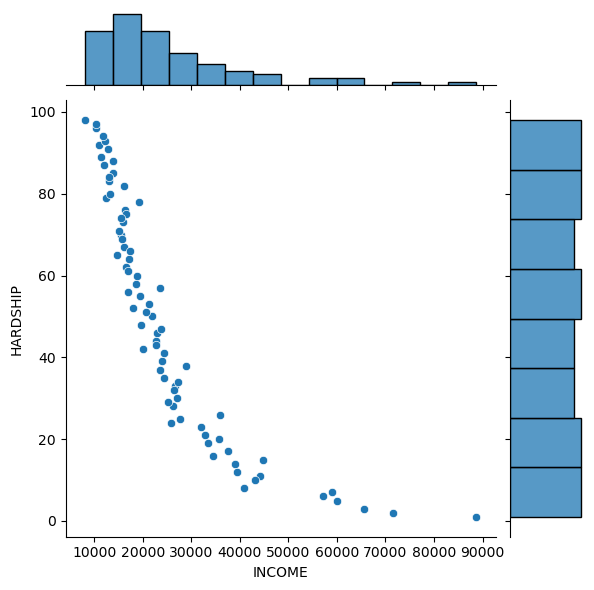

In [16]:
import seaborn as sns

plot = sns.jointplot(x='INCOME',y='HARDSHIP', data=correlation_df)

We can see that there is a negative correlation between hardship index and per capita income, the points distribution resemble that of a negative logarithmic curve. 

In [17]:
conn.commit()
conn.close()